# Randomly select splits to keep in the model

In [1]:
import torch
from sandbox import SimpleModel, toy_data, experiment_series, eval_series
import copy
import matplotlib.pyplot as plt

In [2]:
model_params = (1, 1, 8, 2, 2)

eps = 1e-4
num_kept_neurons = 2
lr=0.005
runs=10

#0: loss: 0.07390148937702179 - size: 209
#1: loss: 0.06600925326347351 - size: 209
#2: loss: 0.05726484954357147 - size: 209
#3: loss: 0.2669546604156494 - size: 209
#4: loss: 0.05996886268258095 - size: 209
#5: loss: 0.05501573532819748 - size: 209
#6: loss: 0.062395285815000534 - size: 209
#7: loss: 0.062102533876895905 - size: 209
#8: loss: 0.059340789914131165 - size: 209
#9: loss: 0.08450400084257126 - size: 209


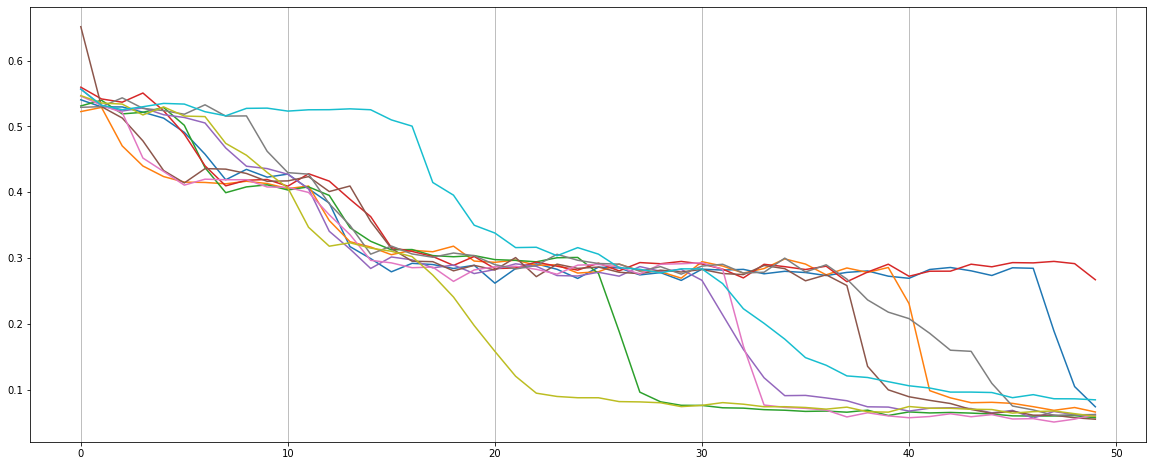

In [3]:
def grow(model):
    new_neurons = model.grow(num_novel=4, eps_novel=eps, eps_split=eps)

    selected = [torch.randperm(n)[:num_kept_neurons] for n in new_neurons]

    model.degrow(*selected)

results = experiment_series(model_params, runs=runs, grow=grow, lr=lr)

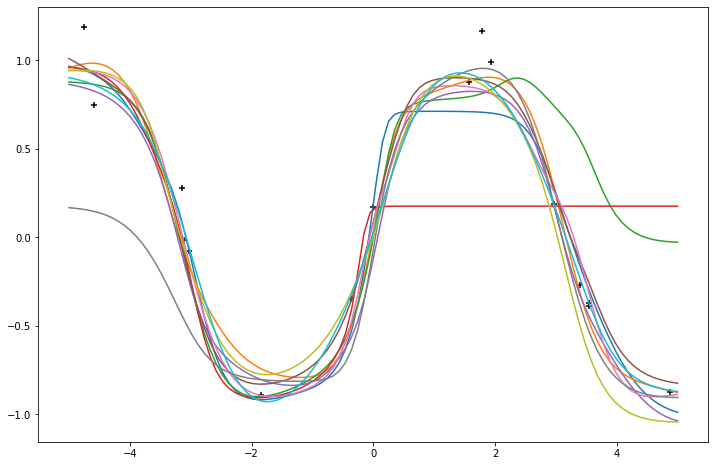

In [4]:
eval_series(results)